In [175]:
## Imports
import numpy as np
import os
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from os import listdir
from PIL import Image
from matplotlib.image import imread

import seaborn as sns
import random

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization,MaxPool2D,Flatten,Dropout

In [176]:
tf.random.set_seed(42)

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
### Data Directory 

data_dir = "/content/drive/MyDrive/Colab Notebooks/Pokemon Detection/pokemoncv/"

### Listsing Data
listdir(data_dir)

['Label_Name.csv', 'Train', 'Test', 'Poke.h5']

In [179]:
### Reading Labels 
Labels = pd.read_csv(data_dir+'Label_Name.csv')

In [180]:
## Test path 
test_path = data_dir+'Test/Test_Images/'
## Train Path
train_path = data_dir+'Train/Train_Images/'

path:  /content/drive/MyDrive/Colab Notebooks/Pokemon Detection/pokemoncv/Train/Train_Images/69d4b4711ef74ff7a90535367aa6508a.jpg
Dimensions: (602, 602, 3)


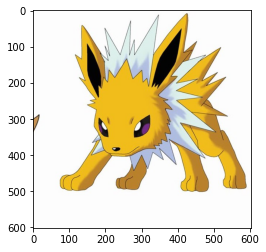

In [181]:
## read Image 

pokemon = train_path+os.listdir(train_path)[57]

print("path: ",pokemon)

print("Dimensions:",(plt.imread(pokemon)).shape)

plt.imshow(imread(pokemon))

In [182]:
## Size of Data

print("Train Data :" , len(listdir(train_path)))

print("Test Data :" , len(listdir(test_path)))

Train Data : 1797
Test Data : 436


In [183]:
### Reading the dimesions of Train size 

dim1 = []

dim2 = []

bad_image = []


for image in listdir(train_path):

  try:
      img = Image.open(train_path+image)
      img.verify()     # to verfy if its an img
      img.close()     #to close img and free memory space
    
      img = plt.imread(train_path+image)   ### Reading the image 
      d1,d2,colors = img.shape             ### Storing the dimensions
      dim1.append(d1)                      ## Storing dimension 1
      dim2.append(d2)                       ## Storing dimension 2
  except (IOError, SyntaxError,ValueError) as e:
      print('Bad file:', image)
      bad_image.append(image)

Bad file: 00000055.png
Bad file: 00000044.png
Bad file: 200010481.png
Bad file: 200010472.png


In [184]:
### Lenghth of images for training  + image discareded == Total images in train
len(dim1) + len(bad_image) == len(listdir(train_path))

True

In [185]:
### Labels 
Labels

## Train Labels

train_labels = pd.read_csv(data_dir+"Train/Train_Data_Labels.csv")

In [186]:
Labels

,Label,Pokemon_Name
0,0.0,Articuno
1,1.0,Blastoise
2,2.0,Charmander
3,3.0,Charmeleon
4,4.0,Cloyster
5,5.0,Gastly
6,6.0,Gengar
7,7.0,Gloom
8,8.0,Golbat
9,9.0,Golem


In [187]:
train_labels

,FileName,Label
0,00000011.png,31.0
1,962696ee8df246c1b4157ba5e8b1529c.jpg,26.0
2,98eab0a1af5043d4b33f4cecf73e48dc.jpg,37.0
3,6c22904780ce4b93b700ea17d7e46746.jpg,16.0
4,51fc29cf72494fc78db5e31539b60729.jpg,14.0
...,...,...
1792,8fbc52e65bdb4c768d037af33d947d53.jpg,11.0
1793,1058c2e931134387a008512071057a77.jpg,38.0
1794,905527f5dd374fbe8086a51c85d31587.jpg,16.0
1795,7c870a2696754f1f810bc11ad103756c.jpg,44.0


In [188]:
## forming y_train label
y=[]
for img in listdir(train_path):
    if img in bad_image:
        pass
    else:
        y.append(train_labels[train_labels['FileName']==img]['Label'].values[0])

In [189]:
len(y) == len(dim1)

True

In [190]:
y

[44.0,
 8.0,
 26.0,
 38.0,
 26.0,
 26.0,
 11.0,
 37.0,
 24.0,
 33.0,
 47.0,
 28.0,
 13.0,
 28.0,
 18.0,
 4.0,
 43.0,
 0.0,
 24.0,
 24.0,
 43.0,
 13.0,
 34.0,
 4.0,
 38.0,
 3.0,
 21.0,
 17.0,
 28.0,
 16.0,
 9.0,
 40.0,
 7.0,
 15.0,
 24.0,
 24.0,
 16.0,
 20.0,
 9.0,
 17.0,
 17.0,
 42.0,
 10.0,
 39.0,
 36.0,
 49.0,
 44.0,
 1.0,
 24.0,
 30.0,
 24.0,
 30.0,
 48.0,
 34.0,
 25.0,
 38.0,
 14.0,
 13.0,
 32.0,
 28.0,
 29.0,
 24.0,
 12.0,
 16.0,
 3.0,
 21.0,
 19.0,
 18.0,
 18.0,
 38.0,
 30.0,
 41.0,
 19.0,
 45.0,
 32.0,
 43.0,
 44.0,
 13.0,
 22.0,
 14.0,
 2.0,
 34.0,
 0.0,
 43.0,
 0.0,
 43.0,
 13.0,
 37.0,
 46.0,
 45.0,
 21.0,
 48.0,
 6.0,
 21.0,
 0.0,
 41.0,
 13.0,
 39.0,
 27.0,
 34.0,
 24.0,
 17.0,
 39.0,
 36.0,
 41.0,
 17.0,
 37.0,
 43.0,
 26.0,
 16.0,
 2.0,
 44.0,
 10.0,
 17.0,
 44.0,
 7.0,
 19.0,
 42.0,
 27.0,
 8.0,
 15.0,
 31.0,
 35.0,
 27.0,
 28.0,
 19.0,
 22.0,
 11.0,
 19.0,
 6.0,
 43.0,
 20.0,
 36.0,
 22.0,
 10.0,
 0.0,
 15.0,
 33.0,
 30.0,
 15.0,
 49.0,
 41.0,
 45.0,
 12.0,
 46.0,
 9.0,

In [191]:
## Converting Y labels to one hot encode
y= pd.get_dummies(y)

In [192]:
##
y

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
## Shape of Y 
y.shape

(1793, 50)

In [194]:
y = np.array(y)

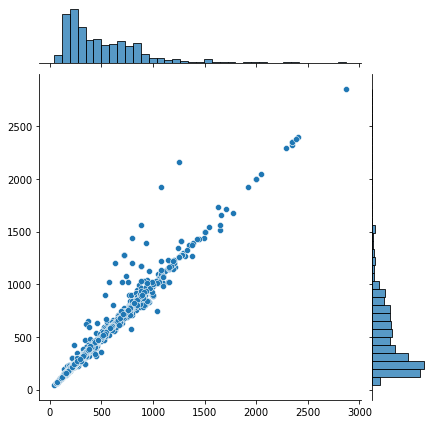

In [195]:
### Visualizing Dimensions of the train images

sns.jointplot(x=dim1,y=dim2)

In [196]:
## Verify y Label

len(y) == len(dim1)

True

In [197]:
np.mean(dim1)

490.23201338538763

In [198]:
np.mean(dim2)

495.7473508087005

In [199]:
np.mean(([np.mean(dim1),np.mean(dim2)]))

492.98968209704407

In [200]:
### resizing images to add uniformity in shape
image_shape = (256,256,3)

In [201]:
### Loading Image Data Set

## necessary imports 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split


In [202]:
### loading data

X=[]
for i in listdir(train_path):
    if i in bad_image:
        pass
    else:
        img = image.load_img(train_path+i,target_size=image_shape)
        img = image.img_to_array(img)
        img = img/255
        X.append(img)
        
X = np.array(X)

In [203]:
len(X) == len(y)

True

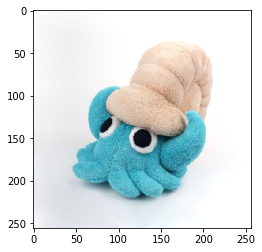

In [204]:
## Visualizing Input

plt.imshow(X[random.randint(0,len(X))])

In [205]:
### Shapes of X and Y 


print("X :",X.shape)

print("\nY :", y.shape)

X : (1793, 256, 256, 3)

Y : (1793, 50)


In [206]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [207]:
del X

In [208]:
### Bulding A CNN 

In [209]:
## Defining Model
model = tf.keras.Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(50,activation='sigmoid'))

In [210]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization_33 (Batc (None, 254, 254, 16)      64        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_34 (Batc (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 62, 62, 32)       

In [211]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=65,validation_data=(X_test,y_test))

Epoch 1/65
38/38 [==============================] - 8s 140ms/step - loss: 0.9008 - accuracy: 0.0208 - val_loss: 1.0981 - val_accuracy: 0.0169
Epoch 2/65
38/38 [==============================] - 5s 126ms/step - loss: 0.7730 - accuracy: 0.0216 - val_loss: 1.2493 - val_accuracy: 0.0220
Epoch 3/65
38/38 [==============================] - 5s 125ms/step - loss: 0.6520 - accuracy: 0.0325 - val_loss: 0.3753 - val_accuracy: 0.0220
Epoch 4/65
38/38 [==============================] - 5s 126ms/step - loss: 0.5095 - accuracy: 0.0291 - val_loss: 0.3476 - val_accuracy: 0.0220
Epoch 5/65
38/38 [==============================] - 5s 125ms/step - loss: 0.3494 - accuracy: 0.0366 - val_loss: 0.2272 - val_accuracy: 0.0220
Epoch 6/65
38/38 [==============================] - 5s 126ms/step - loss: 0.2326 - accuracy: 0.0316 - val_loss: 0.1119 - val_accuracy: 0.0220
Epoch 7/65
38/38 [==============================] - 5s 125ms/step - loss: 0.1633 - accuracy: 0.0408 - val_loss: 0.1067 - val_accuracy: 0.0118
Epoch 

In [ ]:
### Learning Curve Function

def plot_learningcurve(history,epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()




In [ ]:
plot_learningcurve(history=model.history,epoch=65)

In [ ]:
model.save(data_dir+'Poke.h5')

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
y_pred = []

for p in pred:
  y_pred.append(np.argmax(p))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
y_test = [np.argmax(y) for y in y_test]

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print('\n*Classification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix_graph = confusion_matrix(y_test,y_pred)

In [ ]:
confusion_matrix_graph

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix_graph);